In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading the data set

cust_data= pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\ML_DS\\Pandas_Practice\\ML_Data\\customers_data.csv")

In [3]:
cust_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#drop columns channel and region 

cust_data.drop(['Channel', 'Region'], axis = 1, inplace = True)

In [5]:
cust_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
#data exploration/basic stats

cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [7]:
cust_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196BC840EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000196BD0B0470>]], dtype=object)

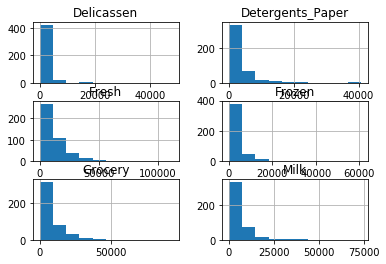

In [8]:
cust_data.hist()

In [9]:
lin_corr= cust_data.corr()

In [12]:
lin_corr['Fresh']  #seems like fresh and frozen has a some what positive relation

Fresh               1.000000
Milk                0.100510
Grocery            -0.011854
Frozen              0.345881
Detergents_Paper   -0.101953
Delicassen          0.244690
Name: Fresh, dtype: float64

In [13]:
lin_corr['Milk'] #  milk and groceries and deg_paper and delicassen have  + correlation

Fresh               0.100510
Milk                1.000000
Grocery             0.728335
Frozen              0.123994
Detergents_Paper    0.661816
Delicassen          0.406368
Name: Milk, dtype: float64

In [14]:
lin_corr['Grocery']  #grocery and milk and detergent paper high coorealion

Fresh              -0.011854
Milk                0.728335
Grocery             1.000000
Frozen             -0.040193
Detergents_Paper    0.924641
Delicassen          0.205497
Name: Grocery, dtype: float64

In [15]:
lin_corr['Frozen']  #frozen and fresh are slightly + related

Fresh               0.345881
Milk                0.123994
Grocery            -0.040193
Frozen              1.000000
Detergents_Paper   -0.131525
Delicassen          0.390947
Name: Frozen, dtype: float64

In [16]:
lin_corr['Detergents_Paper']  #detergent paper and grocery and milk are highly related +ve

Fresh              -0.101953
Milk                0.661816
Grocery             0.924641
Frozen             -0.131525
Detergents_Paper    1.000000
Delicassen          0.069291
Name: Detergents_Paper, dtype: float64

In [17]:
lin_corr['Delicassen']  #delicassen and milk +

Fresh               0.244690
Milk                0.406368
Grocery             0.205497
Frozen              0.390947
Detergents_Paper    0.069291
Delicassen          1.000000
Name: Delicassen, dtype: float64

In [18]:
#scatter_matrix

from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196BD6F5F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000196BD7B5550>]], dtype=object)

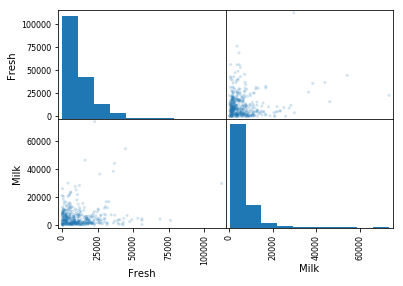

In [19]:
scatter_matrix(cust_data[['Fresh', 'Milk']], alpha= 0.2)

In [20]:
new_cust_data= cust_data

In [21]:
new_cust_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [22]:
##split into train /test 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
cust_train, cust_test= train_test_split(new_cust_data, test_size = 0.25, random_state = 42  )

In [25]:
len(cust_train)

330

In [26]:
len(cust_test)

110

In [27]:
cust_train.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
314,10617,1795,7647,1483,857,1233
3,13265,1196,4221,6404,507,1788
18,18601,6327,10099,2205,2767,3181
393,23632,6730,3842,8620,385,819
60,8590,3045,7854,96,4095,225


In [28]:
cust_test.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022
255,31614,489,1495,3242,111,615
327,542,899,1664,414,88,522


In [29]:
##for both train and test, separating the X and y

In [30]:
y_train= cust_train['Delicassen']

In [31]:
y_train.head()

314    1233
3      1788
18     3181
393     819
60      225
Name: Delicassen, dtype: int64

In [32]:
y_train.shape

(330,)

In [33]:
X_train = cust_train.drop(['Delicassen'], axis = 1)

In [34]:
X_train.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
314,10617,1795,7647,1483,857
3,13265,1196,4221,6404,507
18,18601,6327,10099,2205,2767
393,23632,6730,3842,8620,385
60,8590,3045,7854,96,4095


In [35]:
##same for the test set

In [36]:
y_test= cust_test['Delicassen']

In [37]:
y_test.shape

(110,)

In [38]:
y_test.head()

265    3636
78      167
347    1022
255     615
327     522
Name: Delicassen, dtype: int64

In [39]:
X_test=cust_test.drop(['Delicassen'], axis = 1)

In [40]:
X_test.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
265,5909,23527,13699,10155,830
78,10766,1175,2067,2096,301
347,27380,7184,12311,2809,4621
255,31614,489,1495,3242,111
327,542,899,1664,414,88


In [41]:
##train and test data ready with labels separated (X_train, y_train)  // (X_test, y_test)

In [42]:
##data preparation -- Scaling (only feature data of both train and test) 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler =StandardScaler()

In [45]:
X_train_scaled= scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.fit_transform(X_test)

In [47]:
X_train_scaled

array([[-0.09710786, -0.52156125, -0.0515924 , -0.30793402, -0.42766842],
       [ 0.13235063, -0.59808852, -0.38672791,  0.70985735, -0.49526524],
       [ 0.59473377,  0.05743979,  0.18826525, -0.15860555, -0.0587829 ],
       ..., 
       [-0.72005996, -0.44682259, -0.60124986, -0.33730333, -0.36451367],
       [ 1.55676105,  0.78872882,  0.76814947,  2.102004  , -0.55803372],
       [-0.7630401 ,  0.07430389, -0.04865776, -0.08497545,  0.29001671]])

In [48]:
X_train_scaled= pd.DataFrame(X_train_scaled, index= X_train.index, columns= X_train.columns)

In [49]:
X_train_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
314,-0.097108,-0.521561,-0.051592,-0.307934,-0.427668
3,0.132351,-0.598089,-0.386728,0.709857,-0.495265
18,0.594734,0.057440,0.188265,-0.158606,-0.058783
393,1.030688,0.108926,-0.423802,1.168184,-0.518828
60,-0.272755,-0.361863,-0.031343,-0.594802,0.197699


In [50]:
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns= X_test.columns)

In [51]:
X_test_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
265,-0.445908,3.105134,0.942990,1.390173,-0.471857
78,-0.131081,-0.756299,-0.766318,-0.261556,-0.640300
347,0.945826,0.281790,0.739025,-0.115423,0.735264
255,1.220271,-0.874809,-0.850372,-0.026678,-0.700799
327,-0.793793,-0.803979,-0.825538,-0.606289,-0.708123


In [52]:
##now we can fit the models on the scaled data for better performance

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree_model=  DecisionTreeRegressor(random_state=42)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores_set_1= cross_val_score(tree_model, X_train_scaled, y_train, cv=10, scoring= "neg_mean_squared_error")

In [57]:
scores_set_1  #scores from each fold

array([-56608604.15151515,  -4518612.12121212,  -8211163.24242424,
        -7848751.03030303, -54096299.12121212,  -7358108.6969697 ,
       -10746355.39393939, -10295613.09090909,  -3220469.27272727,
        -8161775.75757576])

In [58]:
rmse_set_1=np.sqrt(-scores_set_1)

In [59]:
rmse_set_1

array([ 7523.86896161,  2125.70273585,  2865.51273639,  2801.56224816,
        7355.018635  ,  2712.58339908,  3278.16341782,  3208.67777923,
        1794.56659746,  2856.88217425])

In [60]:
rmse_set_1.mean() #avg error when predicting delicassan spending

3652.2538684862729

In [61]:
##median price of Delicassan in the train set

y_train.mean()

1590.9151515151516

In [62]:
y_train.median()

931.0

In [63]:
tree_model_2=  DecisionTreeRegressor(random_state=42)

In [64]:
tree_model_2.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [65]:
tree_model_2.score(X_test_scaled, y_test)

-2.3284178476851842

In [66]:
##outlier detection

In [67]:
#An outlier  is calculated as 1.5 times the interquartile range (IQR). 


In [68]:
# For each feature find the data points with extreme high or low values

X_train_scaled.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'], dtype='object')

In [72]:
for feature in X_train_scaled.keys():
    
    Q1 = np.percentile(X_train_scaled[feature], 25)
    
    Q3 = np.percentile(X_train_scaled[feature], 75)
    
    step = 1.5*(Q3 - Q1)
    ##x = x.append(X_train_scaled[((X_train_scaled[feature]<=Q1 - step)| (X_train_scaled[feature]>=Q3+step))])
    x = x.append(X_train_scaled[((X_train_scaled[feature]<=Q1 - step)| (X_train_scaled[feature]>=Q3+step))])
    
    
    
    

In [73]:
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
145,0.892649,0.320239,2.603765,-0.605970,1.838563
351,-0.912257,0.532318,1.381195,-0.254573,1.847641
173,-0.972568,0.229914,1.137718,-0.420861,1.306480
349,-0.498834,1.119623,1.207758,-0.199971,1.766524
211,0.033046,2.867997,3.083284,0.364871,3.155543
209,-0.536181,0.875349,0.840537,-0.435959,1.805537
163,-0.537828,1.258241,1.828825,-0.125100,2.057770
92,-0.220069,2.758891,2.333974,0.053805,3.058203
333,-0.274921,-0.114651,5.783542,-0.587563,6.765599
437,0.242054,1.227834,2.158776,-0.524274,2.273114


In [74]:
x_outlier_index_array= x.index.values

In [75]:
x_outlier_index_array

array([145, 351, 173, 349, 211, 209, 163,  92, 333, 437,  86, 312,  65,
        85,  61,  47, 200, 216, 251, 303, 201,  49, 319, 343,  29, 103,
       239, 125, 370, 129, 258, 282,  47, 259,  52, 436,  87, 325, 109,
       211, 358, 163,  92,  23, 437,  86, 183,  38,  65,  85,  28, 254,
       171,  61,  47, 216, 251, 309,  49, 319, 109, 145, 211, 163,  92,
       333, 437,  86,  65,  85,  28,  61,  47, 216, 251, 201,  43,  49,
       205, 343, 393, 325, 196, 103, 143, 125, 287, 183, 310, 112, 338,
       283, 371, 240, 334, 230,  40, 337, 401,  91, 339,  88, 413, 435,
       145, 351, 173, 349, 211, 209, 163,  92, 333, 437,  86, 312,  65,
        85,  61,  47, 200, 216, 251, 303, 201,  49, 319, 343], dtype=int64)

In [76]:
outlier_index_series=pd.Series(x_outlier_index_array, name ="outlier_index")

In [77]:
outlier_index_series.value_counts().count()  #so 68 unique index outliers

68

In [78]:
#removing outliers

In [79]:
x_outlier_index_array

array([145, 351, 173, 349, 211, 209, 163,  92, 333, 437,  86, 312,  65,
        85,  61,  47, 200, 216, 251, 303, 201,  49, 319, 343,  29, 103,
       239, 125, 370, 129, 258, 282,  47, 259,  52, 436,  87, 325, 109,
       211, 358, 163,  92,  23, 437,  86, 183,  38,  65,  85,  28, 254,
       171,  61,  47, 216, 251, 309,  49, 319, 109, 145, 211, 163,  92,
       333, 437,  86,  65,  85,  28,  61,  47, 216, 251, 201,  43,  49,
       205, 343, 393, 325, 196, 103, 143, 125, 287, 183, 310, 112, 338,
       283, 371, 240, 334, 230,  40, 337, 401,  91, 339,  88, 413, 435,
       145, 351, 173, 349, 211, 209, 163,  92, 333, 437,  86, 312,  65,
        85,  61,  47, 200, 216, 251, 303, 201,  49, 319, 343], dtype=int64)

In [80]:
X_train_scaled_new= X_train_scaled.drop(x_outlier_index_array, axis =0)

In [81]:
y_train_new= y_train.drop(x_outlier_index_array, axis=0)

In [82]:
##repeat for test data , remove outliers

In [84]:
for features in X_test_scaled.keys():
    
    Q1 = np.percentile(X_test_scaled[features], 25)
    
    Q3 = np.percentile(X_test_scaled[features], 75)
    
    step = 1.5*(Q3-Q1)

    y = y.append(X_test_scaled[((X_test_scaled[feature]<= Q1-step) | (X_test_scaled[feature]>= Q3+step))])
    
    #y = hyX_test_scaled[((X_test_scaled[feature]<= Q1-step) | (X_test_scaled[feature]>= Q3+step))]

In [85]:
y.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
331,-0.101459,1.611489,2.873897,-0.438226,2.322574
155,-0.700000,0.887471,1.789562,-0.643386,2.950175
304,-0.818489,0.329470,2.570301,-0.564683,3.015769
77,-0.037806,1.234191,3.123857,-0.513035,3.095692
56,-0.563296,4.204724,2.877865,-0.154979,4.912582


In [86]:
#removing the outliers

In [87]:
test_outlier_array= y.index.values

In [88]:
#unique values

In [89]:
test_outlier_series=pd.Series(test_outlier_array, name = "test_outliers")

In [90]:
test_outlier_series.value_counts().count()

18

In [91]:
X_test_new= X_test_scaled.drop(test_outlier_array, axis = 0)

In [92]:
y_test_new = y_test.drop(test_outlier_array, axis =0)

In [93]:
##pca 
#One goal of this project is to best describe the variation in the different types of customers 
#that a wholesale distributor interacts with.

In [94]:
#Since using PCA on a dataset calculates the dimensions which best maximize variance, 
#we will find which compound combinations of features best describe customers.

In [95]:
from sklearn.decomposition import PCA

In [ ]:
#Applying PCA to the good data with the same number of dimensions as features

In [100]:
pca=PCA(n_components=5)

In [98]:
X_train_scaled_new.shape

(262, 5)

In [101]:
pca.fit(X_train_scaled_new)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper
Dimension 1,0.4651,0.7579,-0.2653,-0.3847,0.1364,-0.4343
Dimension 2,0.3554,0.6361,0.4171,0.5162,-0.0152,0.3933
Dimension 3,0.1023,-0.0973,0.0656,0.0587,0.9901,0.0491
Dimension 4,0.0558,0.0728,-0.8643,0.3194,0.0266,0.3807
Dimension 5,0.0214,-0.0785,-0.0652,0.6929,-0.0091,-0.7137


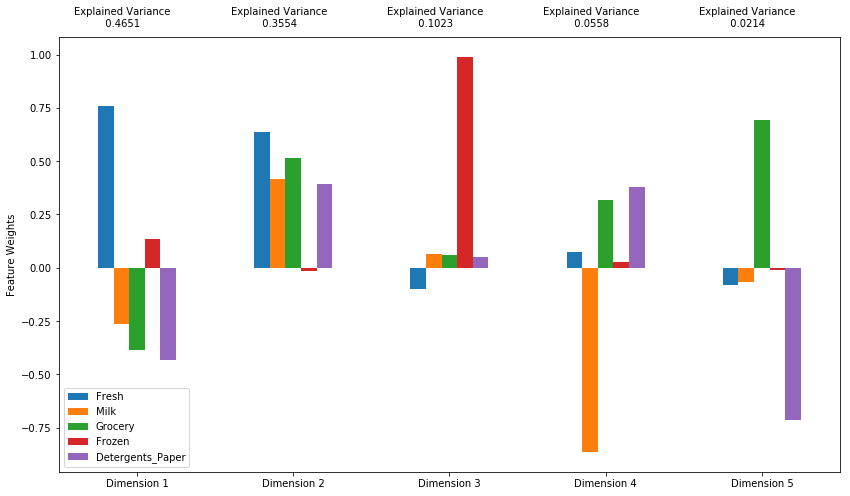

In [126]:
pca_results(X_train_scaled_new, pca)

In [ ]:
#interpreting the PCA dimensions, in terms of customer spending
#from the first PC we see that the there is fresh and frozen are somewhat correlated, a customer with a high value 
#of this 1st PC is more likely to buy Fresh/ Frozen as to the other 3.


#from the last 4th PC we can see ,  a customer with a high value on this PC is much likely to buy detergent and grocery
#and highly unlikely to buy milk

In [102]:
#Percentage of variance explained by each of the selected components.
#sum of var  =1

pca.explained_variance_ratio_

array([ 0.46507582,  0.3554084 ,  0.10234904,  0.05575204,  0.0214147 ])

In [ ]:
#observations

#with 1st dimension, explains about 40% variance in the data
#the 1st and 2nd principal components explain explain 70% variance in the data
#first 4 components explain the ~95% variance

In [ ]:
##Dim Reduction

In [ ]:
#reducing to 2 dimensions, explains over 70% variance in the data

In [127]:
pca=PCA(n_components=2)

In [128]:
pca.fit(X_train_scaled_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [129]:
X_train_reduced= pca.transform(X_train_scaled_new)

In [132]:
Reduced_data=pd.DataFrame(X_train_reduced, columns=['PCA_dim_1', 'PCA_dim_2'])

In [134]:
Reduced_data.head()

,PCA_dim_1,PCA_dim_2
0,0.128483,-0.071113
1,0.619800,-0.172145
2,0.267129,0.877105
3,-0.365506,0.144545
4,1.375329,0.060797


In [ ]:
#clustering

#given that we are using only 2 dimensions that explain around 72% variance, the remaining 28% variance is not 
#evident in the data in 2 dimensions. (data is not as separated as possible)

#so points near the cluster boundaries might be uncertain. 

#this uncertainity cannot be addressed by k means

#GMM (Gaussian) assigns to each data point, the probability of it belonging to a cluster.

In [135]:
from sklearn.mixture import GMM

In [137]:
clusterer= GMM(n_components = 2, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [138]:


clusterer.fit(X_train_reduced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=42,
  tol=0.001, verbose=0)

In [140]:
#predicting the cluster for each data point

pred=clusterer.predict(X_train_reduced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [145]:
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [161]:
##cluster centers

means= clusterer.means_
means

array([[-0.01589699,  0.40279633],
       [ 0.02373675, -0.60143928]])

In [ ]:
#silhouette score

#we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. 
#The silhouette coefficient for a data point measures how similar 
#it is to its assigned cluster from -1 (dissimilar) to 1 (similar).
#Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In [143]:
from sklearn.metrics import silhouette_score

In [146]:
silhouette_score(X_train_reduced,pred, random_state=42 )

0.28627737003659737

In [152]:
for i in range(3,7):
    clusterer_tmp = GMM(n_components = i,random_state=1)
    clusterer_tmp.fit(X_train_reduced)
    preds_tmp = clusterer_tmp.predict(X_train_reduced)
    score_tmp = silhouette_score(X_train_reduced,preds_tmp,random_state=1)
    print ("Silhouette score for n_components = {}: {}".format(i,score_tmp))

Silhouette score for n_components = 3: 0.4799523049952004
Silhouette score for n_components = 4: 0.4377857687648627
Silhouette score for n_components = 5: 0.4135280851802736
Silhouette score for n_components = 6: 0.3772256207476368


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

In [ ]:
## so 3 components gives best results, 3 clusters

In [162]:
pca_1= PCA(n_components=3)

In [163]:
pca_1.fit(X_train_scaled_new)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [164]:
X_train_reduced_1=pca_1.transform(X_train_scaled_new)

In [167]:
X_train_reduced_1= pd.DataFrame(X_train_reduced_1, columns=['pca_dim_1', 'pca_dim_2', 'pca_dim_3'])

In [168]:
X_train_reduced_1.head()

,pca_dim_1,pca_dim_2,pca_dim_3
0,0.128483,-0.071113,-0.127026
1,0.619800,-0.172145,0.830388
2,0.267129,0.877105,0.023670
3,-0.365506,0.144545,-0.351613
4,1.375329,0.060797,0.049395


In [153]:
clusterer_1= GMM(n_components = 3, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [169]:
clusterer_1.fit(X_train_reduced_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=42,
  tol=0.001, verbose=0)

In [170]:
#predicting the cluster to which each data point belongs
pred_1= clusterer_1.predict(X_train_reduced_1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [171]:
pred_1

array([2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1,
       0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2,
       1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 2, 2, 1], dtype=int64)

In [172]:
means_1= clusterer_1.means_

In [173]:
means_1

array([[ 0.78314382,  0.44877349, -0.02692553],
       [-0.97376892,  0.45599285,  0.01736072],
       [ 0.02043349, -0.56535203,  0.00847054]])

In [174]:
silhouette_score(X_train_reduced_1, pred_1, random_state=42)

0.40184307685057014

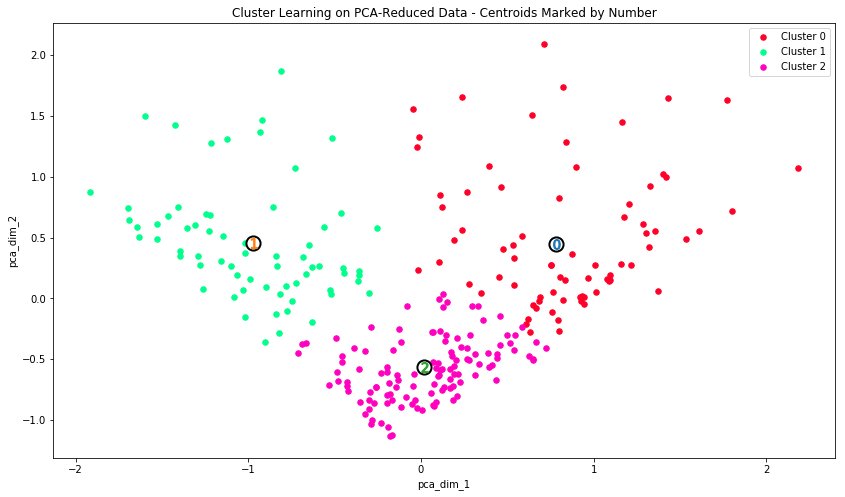

In [206]:
import matplotlib.cm as cm
cluster_results(X_train_reduced_1, pred_1, means_1)

In [ ]:
##so going ahead with 3 clusters, that works best

In [ ]:
##Data Recovery

#a cluster's center point corresponds to the average customer of that segment. 

In [207]:
mean_org= pca_1.inverse_transform(means_1)

In [208]:
mean_org

array([[ 0.72590092, -0.25246696, -0.30425139, -0.13097196, -0.38381644],
       [-0.60541968,  0.21962047,  0.37789541, -0.32688147,  0.38414832],
       [-0.50070236, -0.47077687, -0.53229232, -0.18453574, -0.44972493]])

In [210]:
 recovered_data_centers= scaler.inverse_transform(mean_org)

In [212]:
recovered_data_centers

array([[ 23987.10085922,   4091.44346455,   5211.4047454 ,   2733.1344764 ,
          1106.49418855],
       [  3448.13425521,   6824.13294691,   9853.47693136,   1777.26664623,
          3518.31172768],
       [  5063.66219618,   2827.75128292,   3659.56503   ,   2471.7898775 ,
           899.50651334]])

In [ ]:
##avg customer spending in the fresh, milk, grocery, frozen and paper for cluster segments 0, 1,2

In [205]:
def cluster_results(reduced_data, preds, centers):
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'pca_dim_1', y = 'pca_dim_2',\
                color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    #ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
     #      s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number");



In [ ]:
#plot pca functions
def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)